## correlation of flow porfile accuracy and tt prediction accuray per obstacle 

### preparations

In [25]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# data source files
tt_acc_path = 'tmp/baselines_tt_acc.csv'
fpf_acc_path = 'tmp/baseline_pf_iou_same_obs.csv'

In [ ]:
# load and process the tt accuracy table
tt_acc = pd.read_csv(tt_acc_path)
print('Loaded tt accuracy table:')
print(tt_acc, '\n')

# keep only the sample index and the accuracies
tt_acc = tt_acc[tt_acc['model'] == 'ceyenet']
tt_acc = tt_acc[tt_acc['threshold'] == .025]
tt_acc = tt_acc[['sample', 'accuracy']].sort_values(by='sample').reset_index(drop=True)
tt_acc = tt_acc.rename(columns={'accuracy': 'tt_acc@ET=0.025'})
print('Processed tt accuracy table:')
print(tt_acc, '\n')


In [ ]:
# load the flow profile accuracy table, but process later for each evaluation
fpf_acc = pd.read_csv(fpf_acc_path)
print("Loaded flow profile accuracy table:")
print(fpf_acc)

### evaluation 1: group by sample and take the mean

Processed flow profile accuracy table:
     sample   fpf_acc
0         0  0.945137
1         1  0.919778
2         2  0.880303
3         3  0.926381
4         4  0.912950
..      ...       ...
995     995  0.941488
996     996  0.893563
997     997  0.920218
998     998  0.913783
999     999  0.888351

[1000 rows x 2 columns]
Merged accuracy table:
     sample  tt_acc@ET=0.025   fpf_acc
0         1           0.8449  0.919778
1         2           0.7706  0.880303
2         3           0.7976  0.926381
3         4           0.8707  0.912950
4         5           0.8331  0.939184
..      ...              ...       ...
994     995           0.8208  0.941488
995     996           0.8486  0.893563
996     997           0.8350  0.920218
997     998           0.7522  0.913783
998     999           0.8269  0.888351

[999 rows x 3 columns] 



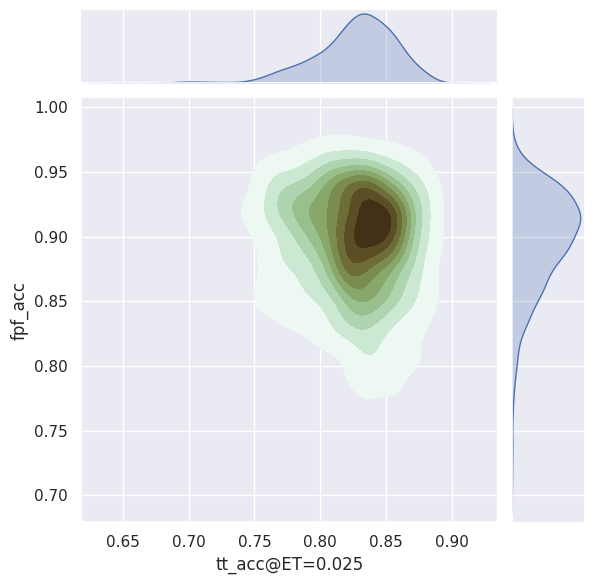

In [ ]:
fpf_acc_1 = fpf_acc[(fpf_acc["model"] == "CEyeNet") & (fpf_acc["obstacles"] == 8)]
fpf_acc_1 = fpf_acc_1[["chn_index", "IoU"]]
fpf_acc_1 = fpf_acc_1.groupby("chn_index").mean().reset_index()
fpf_acc_1 = fpf_acc_1.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"})
print("Processed flow profile accuracy table:")
print(fpf_acc_1)

# merge the two tables
acc = tt_acc.merge(fpf_acc_1, on='sample')
print('Merged accuracy table:')
print(acc, '\n')

cmap = sns.cubehelix_palette(start=10, light=1, as_cmap=True)
# plot the accuracies
sns.jointplot(data=acc, x='tt_acc@ET=0.025', y='fpf_acc', cmap=cmap, fill=True, kind='kde')

### evaluation 2: plot the accuracies for each pin

In [ ]:
def plot_acc(fpf_acc, tt_acc, obstacles):
    fpf_acc_2 = fpf_acc[(fpf_acc["model"] == "CEyeNet") & (fpf_acc["obstacles"] == obstacles)]
    fpf_acc_2.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"}, inplace=True)
    fpf_acc_2.drop(columns=["model", "obstacles"], inplace=True)
    acc = tt_acc.merge(fpf_acc_2, on='sample', how='inner')
    print(acc)
    fg = sns.jointplot(data=acc, x='tt_acc@ET=0.025', y='fpf_acc', kind='kde', hue='pin', legend=False)
    return fg

for i in range(2, 9):
    fg = plot_acc(fpf_acc, tt_acc, i)
    # sns.move_legend(fg.ax_joint, loc='lower left')
    plt.savefig(f'tmp/acc_jointplot_same_{i}.png', dpi=600)
    # break

In [ ]:
fpf_acc_2 = fpf_acc[(fpf_acc["model"] == "CEyeNet")]
fpf_acc_2.rename(columns={"chn_index": "sample", "IoU": "fpf_acc"}, inplace=True)
fpf_acc_2.drop(columns=["model"], inplace=True)
acc = tt_acc.merge(fpf_acc_2, on="sample", how="inner")
print(acc)
fg = sns.jointplot(data=acc, x="tt_acc@ET=0.025", y="fpf_acc", kind="kde", hue="pin", col="obstacles", col_wrap=2)

### Find the obstacles with best/worst prediction accuracy 

In [1]:
# preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
sys.path.append('../')
# load the tt & fpf accuracy tables
tt_acc = pd.read_csv('../tmp/baselines_tt_acc.csv')
tt_acc = tt_acc[tt_acc['model'] == 'ceyenet']
tt_acc = tt_acc[tt_acc['threshold'] == .025]
tt_acc.drop(columns=['model', 'threshold'], inplace=True)
tt_acc.rename(columns={'accuracy': 'tt_acc@ET=0.025'}, inplace=True)

fpf_acc_same = pd.read_csv('../tmp/baseline_pf_iou_same_obs.csv')
fpf_acc_same = fpf_acc_same[(fpf_acc_same['model'] == 'CEyeNet') & (fpf_acc_same['obstacles'] == 8)]
fpf_acc_same.drop(columns=['model', 'obstacles'], inplace=True)
fpf_acc_same.rename(columns={'chn_index': 'sample', 'IoU': 'fpf_acc@obs=8'}, inplace=True)

# prepare the accuracy table
print('Loaded tt accuracy table:')
print(tt_acc, '\n')
print('Loaded flow profile accuracy tables (for same obstacles):')
print(fpf_acc_same, '\n')



Loaded tt accuracy table:
       sample  tt_acc@ET=0.025
9158      798           0.6488
9387      985           0.6782
9512      772           0.6894
9569      584           0.6946
9574      292           0.6949
...       ...              ...
16305     719           0.8836
16332     744           0.8839
16370     337           0.8844
16521     733           0.8867
17988     672           0.9040

[1000 rows x 2 columns] 

Loaded flow profile accuracy tables (for same obstacles):
           pin  sample  fpf_acc@obs=8
8000      0-24       0       0.959214
8001      0-24       1       0.907010
8002      0-24       2       0.893978
8003      0-24       3       0.893756
8004      0-24       4       0.955620
...        ...     ...            ...
116995  76-100     995       0.954205
116996  76-100     996       0.961471
116997  76-100     997       0.943540
116998  76-100     998       0.928418
116999  76-100     999       0.896098

[5000 rows x 3 columns] 



In [2]:
# collect the obstacle ranks for each accuracy
obs_id_ranks = pd.DataFrame()
acc_ranks = pd.DataFrame()

tt_acc = tt_acc.sort_values(by='tt_acc@ET=0.025', ascending=False).reset_index(drop=True)
obs_id_ranks['tt_rank'] = tt_acc['sample']
acc_ranks['tt_rank'] = tt_acc['tt_acc@ET=0.025']

for pin in ['0-24', '19-43', '38-62', '57-81', '76-100']:
    fpf_acc_same_pin = fpf_acc_same[fpf_acc_same['pin'] == pin]
    fpf_acc_same_pin = fpf_acc_same_pin.sort_values(by='fpf_acc@obs=8', ascending=False).reset_index(drop=True)
    obs_id_ranks[f'fpf_pin={pin}'] = fpf_acc_same_pin['sample']
    acc_ranks[f'fpf_pin={pin}'] = fpf_acc_same_pin['fpf_acc@obs=8']

fpf_acc_same_mean = fpf_acc_same.groupby('sample').mean(numeric_only=True).reset_index()
fpf_acc_same_mean = fpf_acc_same_mean.sort_values(by='fpf_acc@obs=8', ascending=False).reset_index(drop=True)
obs_id_ranks['fpf_mean'] = fpf_acc_same_mean['sample']
acc_ranks['fpf_mean'] = fpf_acc_same_mean['fpf_acc@obs=8']
print('Collected obs_id ranks:')
print(obs_id_ranks, '\n')
print('Collected accuracy ranks:')
print(acc_ranks, '\n')

obs_id_ranks.to_csv('../tmp/obs_id_ranks.csv', index=True)
acc_ranks.to_csv('../tmp/acc_ranks.csv', index=True)


Collected obs_id ranks:
     tt_rank  fpf_pin=0-24  fpf_pin=19-43  fpf_pin=38-62  fpf_pin=57-81  \
0        672           699             85            775            921   
1        733           366            361            185            316   
2        337            85            518            360            442   
3        744           377            907            759            386   
4        719            37            495            869            345   
..       ...           ...            ...            ...            ...   
995      292           886            692             45            173   
996      584           584            501            285            584   
997      772           952            931            913            426   
998      985           692            285            931            913   
999      798           285            584            583            583   

     fpf_pin=76-100  fpf_mean  
0               188       185  
1          

In [4]:

from utils.io import find_index

# plot grids of the obstacles according to the ranks
obstacle_dir = '../../dataset/obs_img'
obstacle_list = os.listdir(obstacle_dir)
obstacle_list.remove('.ipynb_checkpoints')
obstacle_list.sort(key=find_index)

obs_to_plot = obs_id_ranks.iloc[995:, 0:].values.flatten()
accs_to_plot = acc_ranks.iloc[995:, 0:].values.flatten()

fig, axs = plt.subplots(5, 7, figsize=(14, 12.5), dpi=600)

for i, obs_id in enumerate(obs_to_plot):
    obs_path = os.path.join(obstacle_dir, obstacle_list[obs_id])
    obs = plt.imread(obs_path)
    axs[i//7, i%7].imshow(obs, aspect='auto')
    axs[i//7, i%7].axis('off')
    axs[i//7, i%7].set_title(f'Obs_id {obs_id}\nAcc: {accs_to_plot[i]:.3f}')
plt.tight_layout()
plt.savefig('../tmp/lowest_obs_ranks.png', dpi=600)
plt.close()


In [12]:
# plot equally spaced ranks
from utils.io import find_index

# plot grids of the obstacles according to the ranks
obstacle_dir = '../../dataset/obs_img'
obstacle_list = os.listdir(obstacle_dir)
obstacle_list.remove('.ipynb_checkpoints')
obstacle_list.sort(key=find_index)


obs_selection = np.linspace(0,999,11)
obs_to_plot = obs_id_ranks.iloc[obs_selection, -1].values.flatten()
accs_to_plot = acc_ranks.iloc[obs_selection, -1].values.flatten()

fig, axs = plt.subplots(1, 11, figsize=(22, 2.2), dpi=600)

for i, obs_id in enumerate(obs_to_plot):
    obs_path = os.path.join(obstacle_dir, obstacle_list[obs_id])
    obs = plt.imread(obs_path)
    axs[i].imshow(obs, aspect='auto')
    axs[i].axis('off')
    axs[i].set_title(f'{obs_id}\n{accs_to_plot[i]:.3f}')
plt.tight_layout()
plt.savefig('../tmp/fpf_acc_obs_ranks.png', dpi=600)
plt.close()

print(obs_to_plot)

[185 725 978  12 948 552 510 190 574 632 584]


## histogram of element values of 100 tt

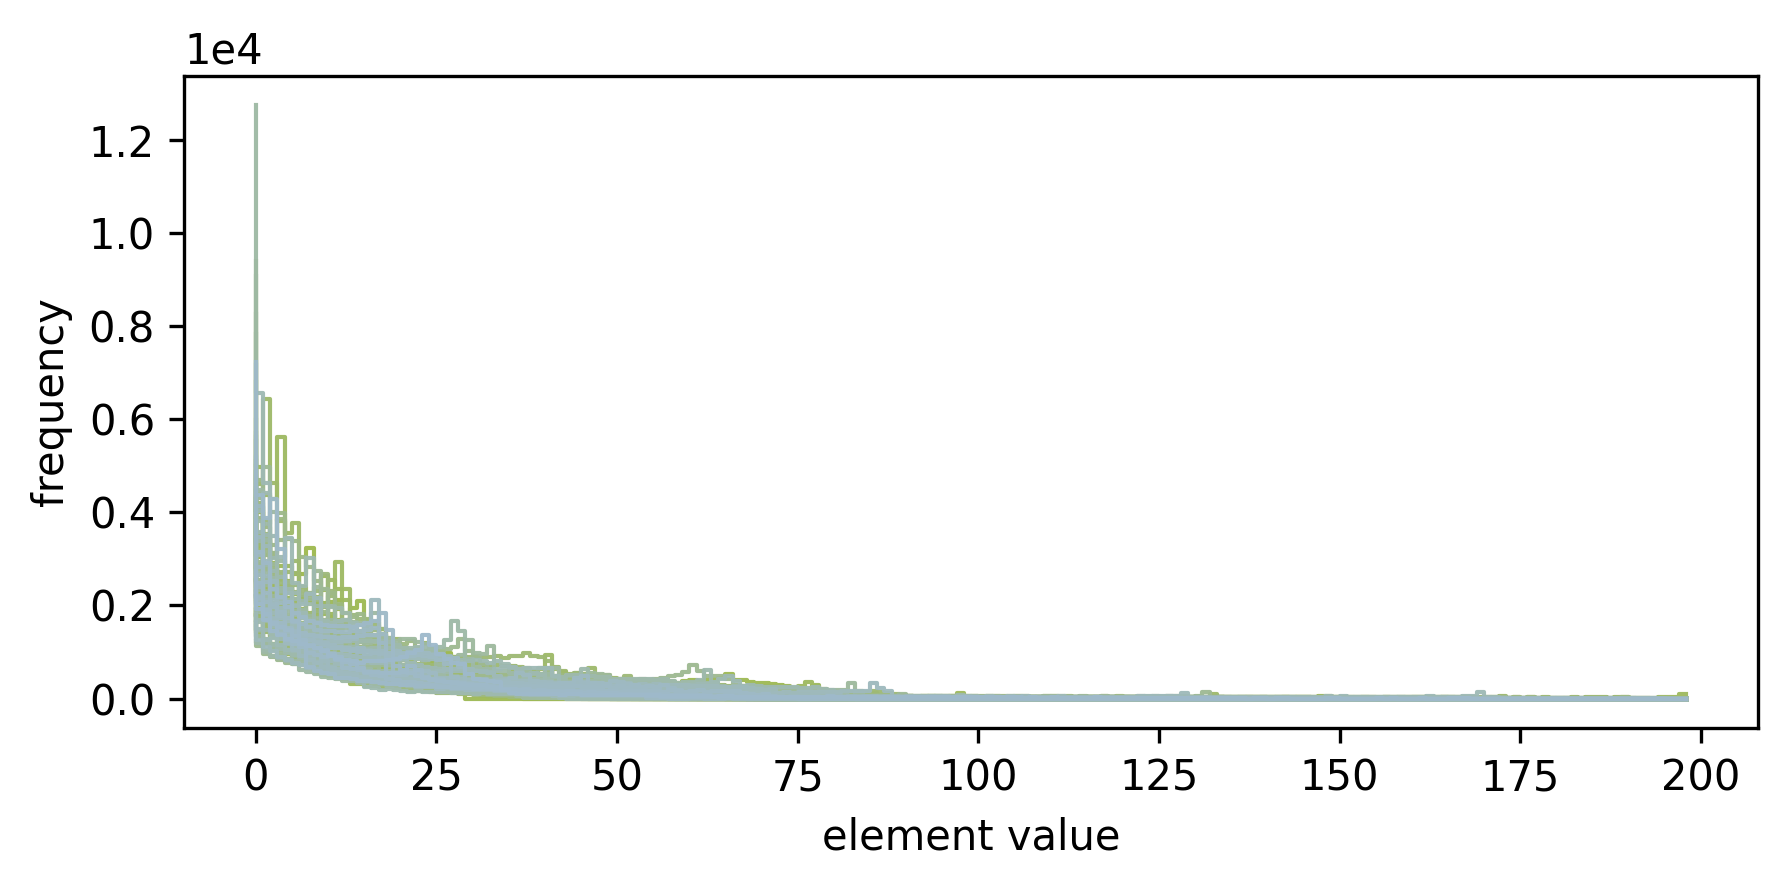

In [ ]:
import os
import random
import numpy as np

from matplotlib import pyplot as plt
from utils.visualization import PASTEL_7
cm= 1/2.54
TT_DIR = r"D:\AIFE Codes\dataset\tt_zigzag_200"
bin = np.array([i for i in range(200)])
tt_list = os.listdir(TT_DIR)
tt_list = random.sample(tt_list, 100)
hists = []
clr = np.array(PASTEL_7["blue"])

for ttp in tt_list:
    tt_path = os.path.join(TT_DIR, ttp)
    tt = np.load(tt_path)
    hist_values, _ = np.histogram(tt, bins=bin)
    hists.append(hist_values)

fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
for i, hist in enumerate(hists):
    plt.step(
        bin[:-1],
        hist,
        color=np.insert(clr, -1, i/100*0.5+0.3,),
        linewidth=1,
    )

plt.rcParams.update({'font.size': 8})
plt.xlabel("element value")
plt.ylabel("frequency")

# set y tick labels to scientific notation
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.tight_layout()
plt.show()

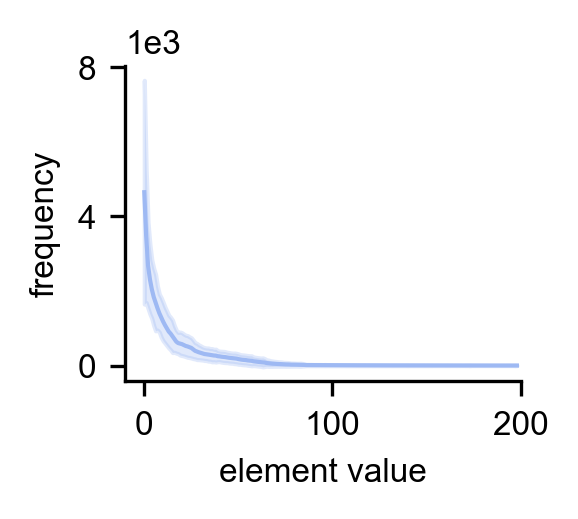

In [3]:
# version 2, plot the profile of all histograms, with average denoted. 
import os
import random
import numpy as np

from matplotlib import pyplot as plt
from utils.visualization import PASTEL_7
cm= 1/2.54
TT_DIR = r"D:\AIFE Codes\dataset\tt_zigzag_200"
bin = np.array([i for i in range(200)])
tt_list = os.listdir(TT_DIR)
tt_list = random.sample(tt_list, 100)
hists = []
clr = np.array(PASTEL_7["blue"])

for ttp in tt_list:
    tt_path = os.path.join(TT_DIR, ttp)
    tt = np.load(tt_path).round()
    hist_values, _ = np.histogram(tt, bins=bin)
    hists.append(hist_values)

hists = np.array(hists)
mean_hist = hists.mean(axis=0)
std_hist = hists.std(axis=0)

plt.rcParams.update({'font.size': 8, 'font.family': 'Arial'})

fig,ax = plt.subplots(figsize=(5*cm, 4.5*cm), dpi=300)
ax.fill_between(bin[:-1], mean_hist-std_hist, mean_hist+std_hist, color=clr, alpha=0.3)
ax.plot(bin[:-1], mean_hist, color=clr, linewidth=1)

plt.xlabel("element value")
plt.ylabel("frequency")

# off right and top axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([0,4000,8000])
ax.set_xlim(-10,200)

# set y tick labels to scientific notation
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.tight_layout()
plt.savefig('tmp.png')

## baseline models

### testset accuracy of baseline models boxplot

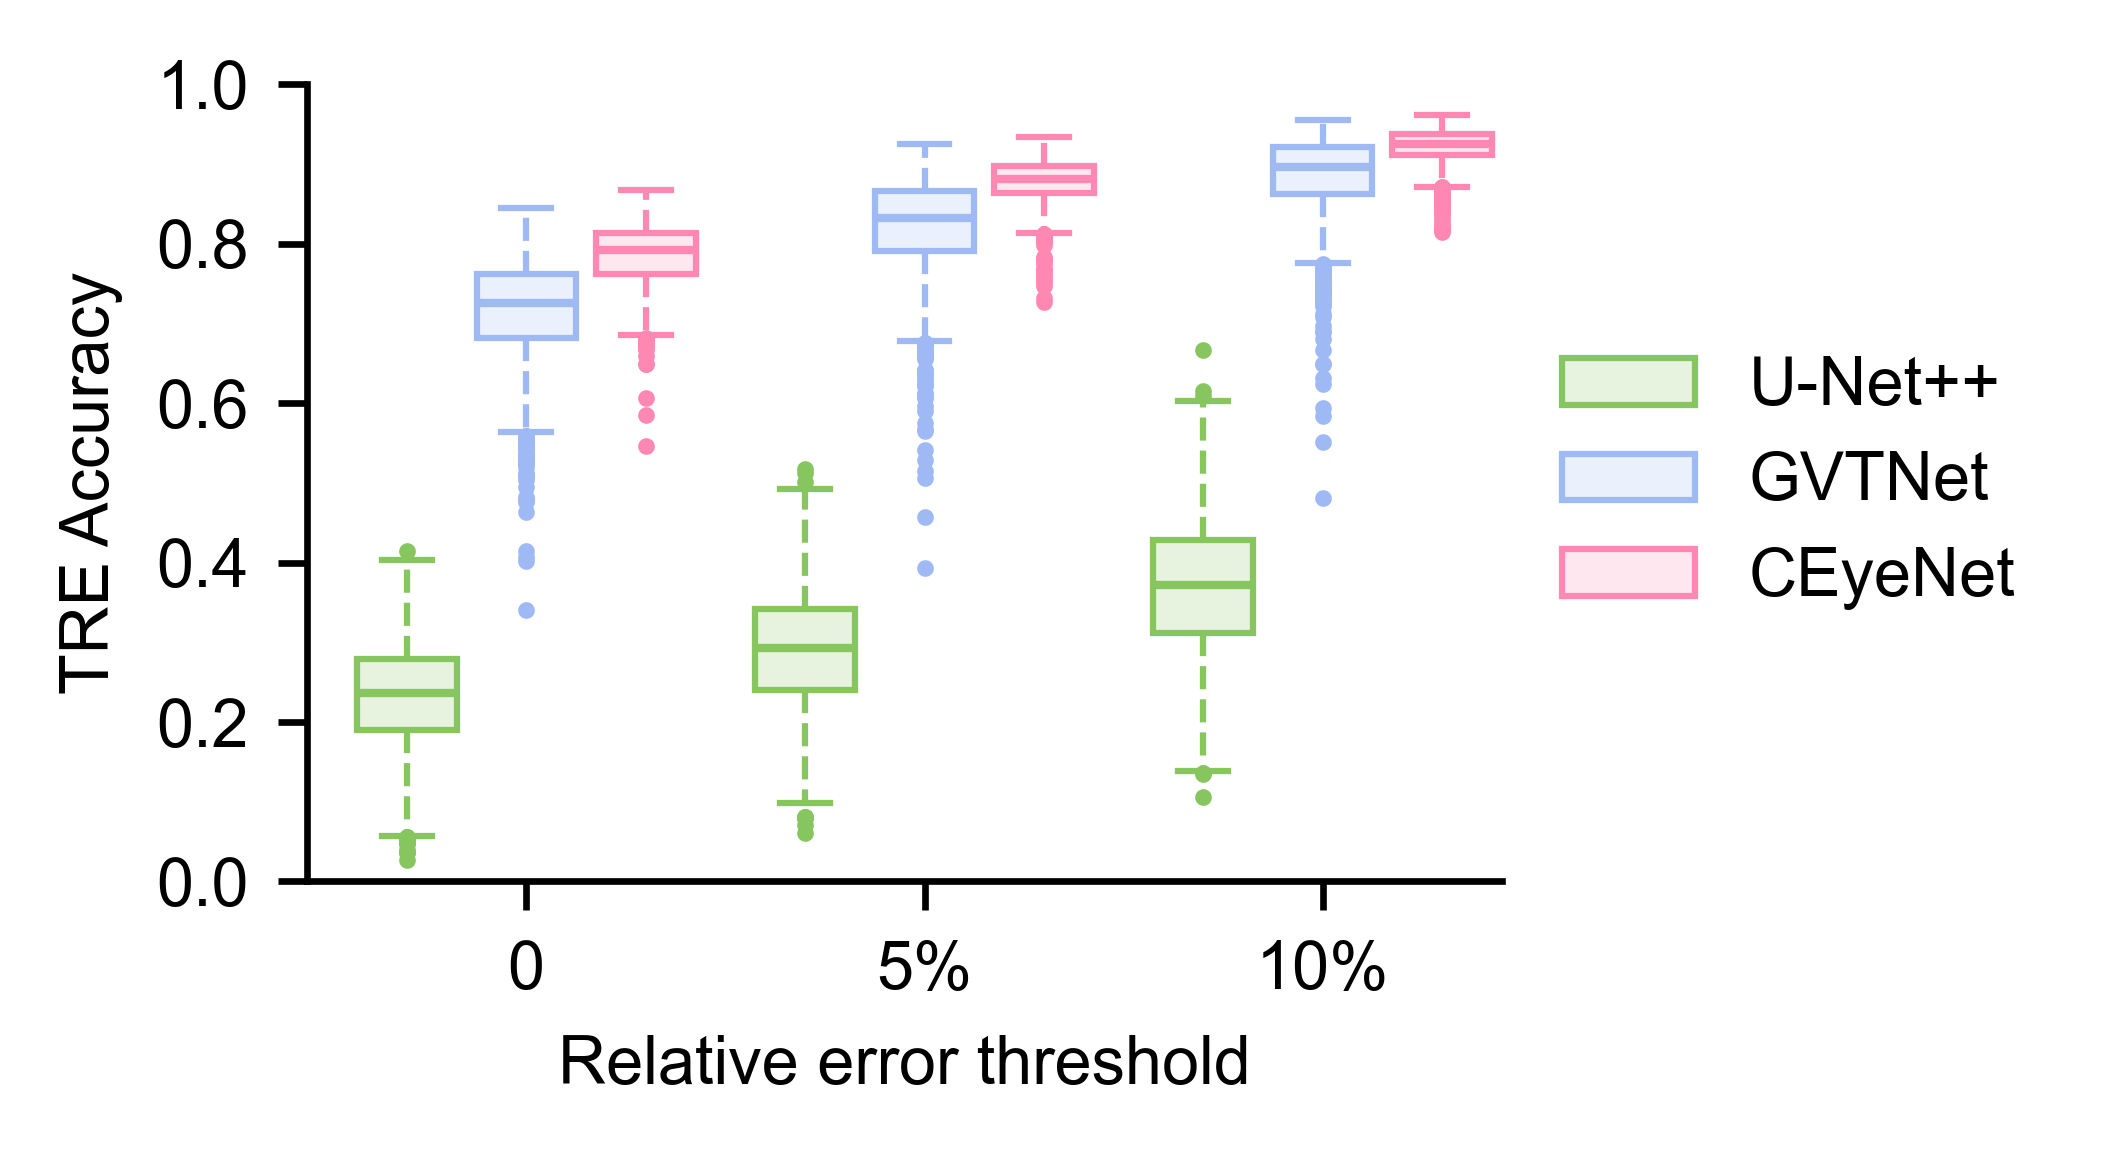

In [8]:
from utils.visualization import PASTEL_7
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
clrs = np.array([PASTEL_7["green"], PASTEL_7["blue"], PASTEL_7["red"]])
cm = 1/2.54
plt.rcParams.update({'font.size':8, 'font.family':'Arial'})
fig, ax = plt.subplots(figsize=(9*cm, 5*cm), dpi=600)

data_dir = r"D:\AIFE Codes\Outputs\testset_acc_baselines"
model_names = ['U-Net++', 'GVTNet', 'CEyeNet']
data_paths = ['unpp_accs.csv', 'gvtn_accs.csv', 'ceyenet_accs.csv']
testset_acc = {}
boxplots = {}
models =[]
for i, dpth in enumerate(data_paths):
    model_name = model_names[i]
    acc_lst = pd.read_csv(
        os.path.join(data_dir, dpth), header=0
    )
    # print(acc_lst[['RET=0.0','RET=0.05','RET=0.1']].describe())
    testset_acc[model_name] = acc_lst
    boxplots[model_name] = ax.boxplot(
        [acc_lst['RET=0.0'], acc_lst['RET=0.05'], acc_lst['RET=0.1']],
        positions = [1+i * 1.2, 5+i*1.2, 9+i*1.2],
        widths=1,
        flierprops=dict(marker='o', markersize=1, markeredgecolor=clrs[i]),
        medianprops=dict(color=clrs[i]),
        patch_artist=True,
        boxprops=dict(edgecolor=clrs[i] ,facecolor=np.append(clrs[i], .2), linewidth=.75),
        whiskerprops=dict(color=clrs[i], linewidth=.75, linestyle='--'),
        capprops=dict(color=clrs[i], linewidth=.75),
    )
ax.set_xlim(0, 12)
ax.set_xticks([2.2, 6.2, 10.2])
ax.set_xticklabels(['0', '5%', '10%'])
ax.set_xlabel("Relative error threshold")
ax.set_ylim([0,1])
ax.set_ylabel("TRE Accuracy")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(
    [boxplots[model_name]["boxes"][0] for model_name in model_names],
    model_names,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=8,
    framealpha=0,
    
)
plt.tight_layout()
plt.savefig('accuracy of baseline models.png')

### boxplot of inference time of baseline models

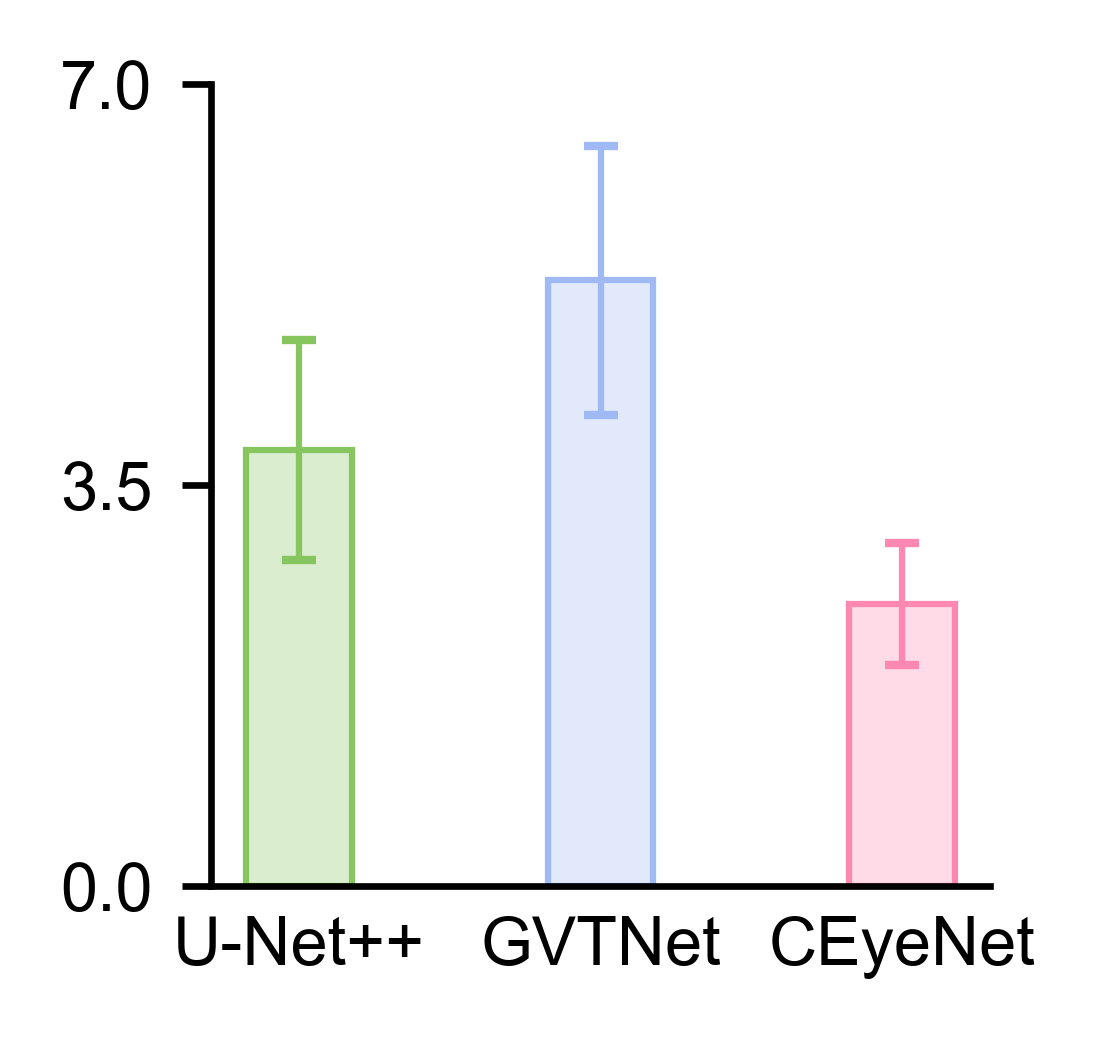

In [1]:
# small batch pred
from utils.visualization import PASTEL_7
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

clrs = np.array([PASTEL_7["green"], PASTEL_7["blue"], PASTEL_7["red"]])
cm = 1 / 2.54
plt.rcParams.update({"font.size": 8, "font.family": "Arial"})
fig, ax = plt.subplots(figsize=(4.7 * cm, 4.5 * cm), dpi=600)

data_path = r"..\Numerical Analysis Data\Model Evaluation\baselines\baseline_time_online.csv"
data = pd.read_csv(data_path, header=0)
data = data[["unpp", "gvtn", "ceyenet"]] # per batch
# filter out the first and last batch which has unreasonable long time for unknown reasons.
data = data.iloc[1:-1]

mean_it = data.mean()
std_it = data.std()

barplots = []
for i, mean, std in zip(range(3), mean_it, std_it):
    bar = ax.bar(
        i,
        mean,
        yerr=std,
        capsize=2,
        color=np.append(clrs[i], 0.3),
        edgecolor=clrs[i],
        linewidth=0.75,
        ecolor=clrs[i],
        width = .35
    )
    barplots.append(bar)
for bar in barplots:
    for line in bar.errorbar.lines[1]:
        line.set_linewidth(0.75)
    for line in bar.errorbar.lines[2]:
        line.set_linewidth(0.75)

ax.set_xticks(range(3))
ax.set_xticklabels(["U-Net++", "GVTNet", "CEyeNet"])
ax.tick_params(axis="x", length=0)
ax.set_yticks([0, 3.5, 7])
# ax.set_xlabel("Online inference time (ms)")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig("infer time of baseline models.png")



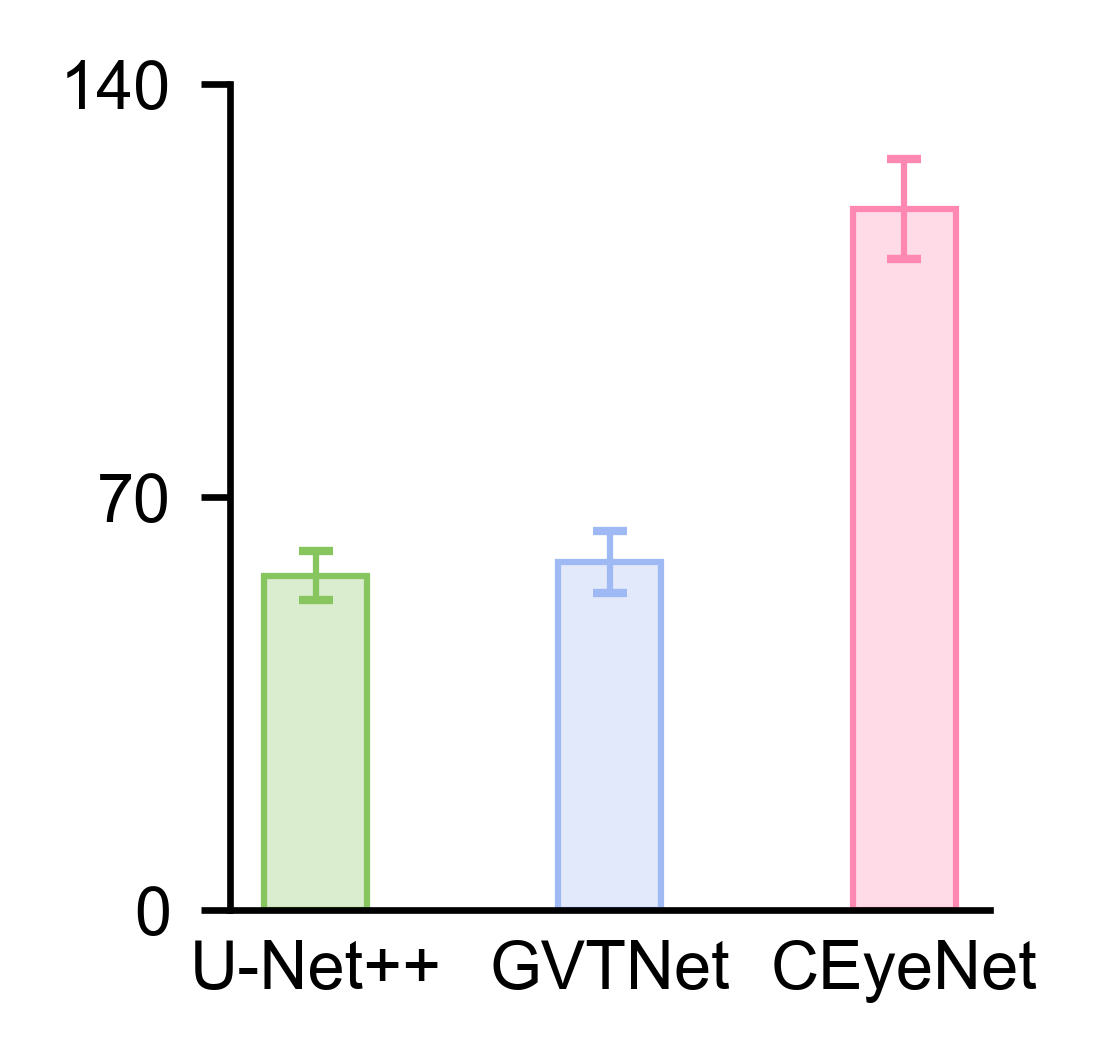

In [2]:
from utils.visualization import PASTEL_7
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

clrs = np.array([PASTEL_7["green"], PASTEL_7["blue"], PASTEL_7["red"]])
cm = 1 / 2.54
plt.rcParams.update({"font.size": 8, "font.family": "Arial"})
fig, ax = plt.subplots(figsize=(4.7 * cm, 4.6 * cm), dpi=600)

data_path = r"..\Numerical Analysis Data\Model Evaluation\baselines\baseline_throughput_screen.csv"
data = pd.read_csv(data_path, header=0)
data = data[["unpp", "gvtn", "ceyenet"]] 


mean_it = data.mean()
std_it = data.std()

barplots = []
for i, mean, std in zip(range(3), mean_it, std_it):
    bar = ax.bar(
        i,
        mean,
        yerr=std,
        capsize=2,
        color=np.append(clrs[i], 0.3),
        edgecolor=clrs[i],
        linewidth=0.75,
        ecolor=clrs[i],
        width = .35
    )
    barplots.append(bar)
for bar in barplots:
    for line in bar.errorbar.lines[1]:
        line.set_linewidth(0.75)
    for line in bar.errorbar.lines[2]:
        line.set_linewidth(0.75)

ax.set_xticks(range(3))
ax.set_xticklabels(["U-Net++", "GVTNet", "CEyeNet"])
ax.tick_params(axis="x", length=0)
ax.set_yticks([0, 0.7e5, 1.4e5])
ax.set_yticklabels(["0", "70", "140"])
# ax.set_xlabel("Screening throughput (kHz)")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig("throughput of baseline models.png")



### example TT plots

In [1]:
import numpy as np
from utils.visualization import plot_tt_streamline, create_profile_figure
from utils.utils import mkdirs
from utils.data_process import tt_postprocess
import os
import matplotlib.pyplot as plt
from palettable.cartocolors.qualitative import Pastel_7
from tools.trainer import Trainer
from utils.io import load_cfg_yml

# plot predictions
tt_index = [72, 777, 832]
model_names = ['UNet++', 'GVTN', 'CEyeNet']
for model in model_names:
    tt_path = f"../log/{model}/eval/all_preds.npy"
    tt = np.load(tt_path)
    out_dir = mkdirs(f"tmp/baseline_pfs/{model}")
    for idx in tt_index:
        fig, ax = create_profile_figure(2,2)
        plot_tt_streamline(tt_postprocess(tt[idx]),ax)
        plt.savefig(os.path.join(out_dir, f"tt_{idx}.png"))
        plt.close(fig)

# plot ground truth
cfg = load_cfg_yml('config/template.yml')
_, dataset = Trainer.create_dataset(cfg)
out_dir = mkdirs("tmp/baseline_pfs/ground_truth")

for idx in tt_index:
    fig, ax = create_profile_figure(2,2)
    _, tt = dataset.__getitem__(idx)
    plot_tt_streamline(tt_postprocess(tt), ax, cmap=Pastel_7.mpl_colormap)
    plt.savefig(f"tmp/baseline_pfs/ground_truth/tt_{idx}.png")
    plt.close(fig)

c:\Users\User\miniconda3\envs\dev311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: [Errno 2] No such file or directory: '../log/UNet++/eval/all_preds.npy'

## profile pixel travel range

In [ ]:
def pix_travel_range():
    """
    1. generate a list of random obs sequences, save it to a file.
    2. form the resultant tt, plot the tt and the norm.
    3. evaluate the level of randomness of each resultant tt by mean std, max.
    """
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    from tqdm.auto import trange
    import pandas as pd

    from utils.utils import mkdirs
    from data.dataset import FDataset
    from utils.data_process import tt_convert, tt_synth
    from utils.visualization import plot_tt_vf

    obs_img_dir = r"../dataset/obs_imgs"
    tt_dir = r"../dataset/tt"

    def p_range_data(dir, sname, seq_len, seed_num):
        root_dir = os.path.join(dir, sname)
        tt_img_dir = os.path.join(root_dir, "tt_img")
        mkdirs(tt_img_dir)
        norm_img_dir = os.path.join(root_dir, "norm_img")
        mkdirs(norm_img_dir)

        seq = (np.random.rand(seed_num, seq_len) * 8999).round().astype("int16")
        seq_table = pd.DataFrame(seq, columns=np.arange(seq_len))
        table_path = os.path.join(root_dir, sname + ".xlsx")

        seq_prcs = []
        stats = pd.DataFrame(columns=["idx", "mean", "std", "max", "grad-mean"])
        data = FDataset(obs_img_dir, tt_dir)

        for i in tqdm(range(seed_num), leave=False):
            tt_list = []
            stp_prcs = []
            for j, idx in enumerate(seq[i]):
                _, tt = data.__getitem__(idx)
                trans_flag = ""
                if np.random.randn() > 0.5:
                    tt = tt_convert(tt, False, True)
                    trans_flag = "vert"
                stp_prcs.append(trans_flag)
                tt_list.append(tt.transpose(1, 2, 0).round().astype("int16"))
            seq_prcs.append(stp_prcs)
            tt_fin = tt_synth(tt_list)
            norm = np.linalg.norm(tt_fin, axis=2)
            grad = np.stack(np.gradient(norm), axis=2)
            grad_norm = np.linalg.norm(grad, axis=2)
            stat = pd.DataFrame(
                {
                    "idx": [i],
                    "mean": [np.nanmean(norm)],
                    "std": [np.nanstd(norm)],
                    "max": [np.nanmax(norm)],
                    "grad-mean": [np.nanmean(grad_norm)],
                }
            )
            stats = pd.concat([stats, stat], ignore_index=True)

            fig, ax = plt.subplots(figsize=[5, 5], dpi=300, layout="tight")
            plot_tt_vf(tt_fin, ax, [20, 20])
            plt.savefig(os.path.join(tt_img_dir, f"tt_{i}.png"))
            ax.cla()
            im = ax.imshow(norm.T, origin="lower", cmap="rainbow", vmax=100)
            fig.colorbar(im, location="right")
            plt.savefig(os.path.join(norm_img_dir, f"n_{i}.png"))
            plt.close()
        seq_table.to_excel(table_path, sheet_name="obs_sequences")
        pd.DataFrame(seq_prcs).to_excel(os.path.join(root_dir, "seq_prcs.xlsx"))
        stats.to_excel(
            os.path.join(root_dir, sname + "_stat.xlsx"),
            sheet_name="stats",
        )
        return stats.mean(0, skipna=True)

    all_stats = pd.DataFrame()
    for j in trange(1, desc="repeat"):
        for i in trange(12, 13, desc="sample", leave=False):
            tqdm.write(f"\n{i}")
            stat = p_range_data(
                "other data/230220 p range", f"s{i}-grad", seq_len=i, seed_num=1
            )
            print("\n")
            all_stats = pd.concat([all_stats, stat], axis=1, ignore_index=True)
        (all_stats.T).to_excel(f"all_stats_{j}.xlsx")

## obstacle framework eval

In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from easydict import EasyDict
from itertools import product

from utils.io import find_index
from utils.data_process import tt_convert, tt_postprocess, tt_synth
from utils.utils import mkdirs

N_SEQUENCES = 1000
LEN_SEQUENCE = 8
POS_SWITCH = False
H_SYM_SWITCH = False
TT_DIR = r"../obs_frameworks//tt_pillar_200"
EXPORT_DIR = r"../obs_frameworks/eval_results/pillar"

In [ ]:
class ObsFrameWorkCharacterizer:
    def __init__(self, cfg) -> None:
        self.cfg = cfg
        mkdirs(self.cfg.export_dir)
        self.init_dataset()

    def sample(self):
        #  self.n_obstacles should be smaller than the total number of tt in the data_dir
        sequences = self.sampling_obstacle_sequences(
            self.n_obstacles,
            self.cfg.n_sequences,
            self.cfg.len_seq,
            self.cfg.pos_switch,
            self.cfg.h_sym_switch,
        )
        tt_all = []
        for seq in tqdm(sequences):
            seq_tt = []  # result tt for all the sub sequences.
            tt_list = [self.get_tt(*obstacle) for obstacle in seq]
            for i in range(len(tt_list)):
                result_tt = tt_synth(tt_list[: i + 1])
                seq_tt.append(result_tt)
            seq_tt = np.stack(seq_tt, axis=0)
            tt_all.append(seq_tt)
        # characterizing all the tt in the experiment.
        tt_all = np.stack(tt_all, axis=0)  # shape of [n_sequences, len_seq, H, W, 2]
        displacement = np.linalg.norm(tt_all, axis=-1).astype(np.float32)
        segregation = self.compute_pix_segeration(tt_all)
        dist_stats = self.compute_statistics(displacement)
        seg_stats = self.compute_statistics(segregation)

        # write the statistics, sequences, displ and seg to files.
        dist_stats = pd.DataFrame(dist_stats, columns=["mean", "std", "max", "median"])
        seg_stats = pd.DataFrame(seg_stats, columns=["mean", "std", "max", "median"])
        dist_stats.to_csv(os.path.join(self.cfg.export_dir, "displacement_stats.csv"))
        seg_stats.to_csv(os.path.join(self.cfg.export_dir, "segregation_stats.csv"))
        np.save(os.path.join(self.cfg.export_dir, "sequences.npy"), sequences)
        np.save(os.path.join(self.cfg.export_dir, "displacement.npy"), displacement)
        np.save(os.path.join(self.cfg.export_dir, "segregation.npy"), segregation)

    def init_dataset(self):
        self.data_list = os.listdir(self.cfg.tt_dir)
        if find_index(self.data_list[0]):
            self.data_list.sort(key=find_index)
        else:
            self.data_list.sort()
        self.total_data_num = len(self.data_list)
        n_obstacles = self.cfg.n_obstacles or self.total_data_num
        self.n_obstacles = min(self.total_data_num, n_obstacles)
        # write the dataset to file
        with open(os.path.join(self.cfg.export_dir, "dataset.txt"), "w") as f:
            for i, item in enumerate(self.data_list[: self.n_obstacles]):
                f.write(f"{i}:\t\t{item}\n")

    def get_tt(self, obs_index, pos, h_sym):
        tt_file = self.data_list[obs_index]
        tt = np.load(os.path.join(self.cfg.tt_dir, tt_file))
        res = tt.shape[0]
        if pos + h_sym:
            tt = tt_convert(tt, h_sym, pos)
        return tt_postprocess(tt)

    def compute_statistics(self, tts):
        """compute statistics of the displacement or segregation of each sub sequence"""
        mean = np.mean(tts, axis=(0, -2, -1))
        std = np.std(tts, axis=(0, -2, -1))
        max = np.max(tts, axis=(0, -2, -1))
        median = np.median(tts, axis=(0, -2, -1))
        return np.stack([mean, std, max, median], axis=-1)

    @staticmethod
    def sampling_obstacle_sequences(
        n_obstacles,
        n_sequences,
        seq_len,
        pos_switch: bool = False,
        h_sym_switch: bool = False,
    ):
        obs_indices = np.random.randint(0, n_obstacles, size=(n_sequences, seq_len))
        pos = np.random.randint(0, int(pos_switch) + 1, size=(n_sequences, seq_len))
        h_sym = np.random.randint(0, int(h_sym_switch) + 1, size=(n_sequences, seq_len))
        sequences = np.stack([obs_indices, pos, h_sym], axis=-1)
        return sequences

    @staticmethod
    def compute_pix_segeration(tts):
        """pixel segregation: per pixel; sum of norm of dispalcement differnece to up,down, left, right neighbours.
        tt should be shape of [(Seq, (Sub_length,))  H, W, 2].
        """

        def compute_diff(tts, axis, shift):
            roll_tts = np.roll(tts, shift, axis=axis)
            # set the row that roll-across-boundary to 0. i.e. if shift = 1, the first row will be set to 0. if shift = -1, the last row will be set to 0.
            slice_ = (
                (slice(None),) * (tts.ndim + axis)
                + (min(shift, 0),)
                + (slice(None),) * (-axis - 1)
            )
            roll_tts[slice_] = 0
            diff = np.linalg.norm(roll_tts - tts, axis=-1)
            return diff.astype(np.float32)

        seg_sum = np.zeros(tts.shape[0:-1], dtype=np.float32)
        for axis, shift in product(
            [-3, -2], [-1, 1]
        ):  # the segregation to neighbours in H and W direction.
            seg_sum += compute_diff(tts, axis, shift)

        return seg_sum  # shape of [Seq, (Sub_length,) H, W], 

In [ ]:
cfg = EasyDict()
cfg.tt_dir = TT_DIR
cfg.n_obstacles = None
cfg.n_sequences = N_SEQUENCES
cfg.len_seq = LEN_SEQUENCE
cfg.pos_switch = POS_SWITCH
cfg.h_sym_switch = H_SYM_SWITCH
cfg.export_dir = EXPORT_DIR
tt_characterize = ObsFrameWorkCharacterizer(cfg)
tt_characterize.sample()

### violin plot of obstacle framework performance


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from utils.visualization import PASTEL_7

matplotlib.use("Qt5Agg")
DATA_ROOT_DIR = r"D:\AIFE Codes\Outputs\Channel_scheme_characterize\data"
OBS_TYPES = ["HG", "CR", "Pillars", "HAO\n(n=5)"]
OBS_TYPES_DIR = ["herringbone", "chevron", "pillar", "zigzag"]
COLORS = np.array(
    [PASTEL_7["purple"], PASTEL_7["green"], PASTEL_7["blue"], PASTEL_7["red"]]
)
RES = 200
DATA_TYPES = ["displacement", "segregation"]


In [ ]:
def preprocess_data(datatypes):
    processed_data = {"displacement": [], "segregation": []}
    for data_type in datatypes:
        for channel_type in OBS_TYPES_DIR:
            # load the tts and keep only the max-len sequences, and get MPS or MPD by mean over tt
            last_tt_data = np.load(
                os.path.join(DATA_ROOT_DIR, channel_type, f"{data_type}.npy")
            )[:, -1, :, :].mean(axis=(1, 2))
            last_tt_data = last_tt_data.flatten()
            # # shrink the size of the data
            # last_tt_data = np.sort(last_tt_data)[::1000]
            if data_type == "segregation":
                last_tt_data = (
                    last_tt_data / 4
                )  # divide by 4 to get the mean of the 4 directions.
            processed_data[data_type].append(last_tt_data)
            data = np.stack(processed_data[data_type], axis=1)
            np.save(
                os.path.join(DATA_ROOT_DIR, f"{data_type}_violin_plot_data.npy"), data
            )


def violin_plot(data, x_labels=OBS_TYPES, violin_kwargs={}, axe_kwargs=None):
    if isinstance(data, str):
        data = np.load(data)

    n_violins = data.shape[1]
    default_kwargs = {
        "positions": [i + 1 for i in range(n_violins)],
        "widths": 0.7,
        "showmeans": False,
        "showmedians": True,
        "showextrema": False,
        "quantiles": [[0.25, 0.75]] * n_violins,
        "points": 1000,
        "bw_method": "silverman",
    }
    violin_kwargs = {**default_kwargs, **violin_kwargs}

    matplotlib.rcParams.update({"font.size": 8, "font.family": "Arial"})
    cm = 1 / 2.54
    fig, ax = plt.subplots(figsize=(6 * cm, 5 * cm), dpi=600)
    plots = ax.violinplot(data, **violin_kwargs)

    for pc, color in zip(plots["bodies"], COLORS):
        pc.set_alpha(None)
        pc.set_facecolor(np.append(color, 0.3))
        pc.set_edgecolor(color)
        pc.set_linewidth(1)
    plots["cmedians"].set_color(COLORS)
    plots["cmedians"].set_linewidth(1)

    if violin_kwargs.get("showextrema", True):
        plots["cmaxes"].set_color(COLORS)
        plots["cmins"].set_color(COLORS)
        plots["cbars"].set_color(COLORS)
    if violin_kwargs.get("quantiles", True):
        plots["cquantiles"].set_color(COLORS.repeat(2, axis=0))
        plots["cquantiles"].set_linestyle("--")
        plots["cquantiles"].set_linewidth(0.5)
    if axe_kwargs:
        ax.set(**axe_kwargs)

    # axis styling
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.xaxis.set_tick_params(size=0)

    plt.xticks(ticks=default_kwargs["positions"], labels=x_labels)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.tight_layout()


# preprocess_data(DATA_TYPES)

mpd_axe_kwargs = {
    "ylim": [0, 125],
}
mps_axe_kwargs = {
    "ylim": [0, 10],
}
mps_data = np.load(os.path.join(DATA_ROOT_DIR, "segregation_violin_plot_data.npy"))
mpd_data = np.load(os.path.join(DATA_ROOT_DIR, "displacement_violin_plot_data.npy"))
violin_plot(mps_data, axe_kwargs=mps_axe_kwargs)
plt.savefig("segregation_violin_plot.png")
plt.close()
violin_plot(mpd_data, axe_kwargs=mpd_axe_kwargs)
plt.savefig("displacement_violin_plot.png")
plt.close()

## predicted flow profiles evaluation

### generate profile and evaluate accuracies

In [1]:


import os
import numpy as np
from tqdm import tqdm
import pandas as pd

from utils.data_process import gen_pin_tensor, p_transform, tt_convert
from tools.acc_metrics import calc_iou, calc_matching_rate
from utils.utils import mkdirs


def sample_testset_channel(n_chn, n_obs, out_dir=None, random=True):
    """sample n_chn channel structures from the testset.
    If out_dir is provided, return the path to the saved tables. If not, return the dataframes.
    Args:
        n_chn: int, the number of channels to sample
        n_obs: int, the number of obstacles in each channel
        out_dir (optional): str, the path to save the sampled channel structures."""
    if random:
        chn_obs_ids = np.random.randint(0, 1000, size=(n_chn, n_obs))
        chn_obs_pos = np.random.randn(n_chn, n_obs) > 0
    else:
        chn_obs_ids = np.arange(0, n_chn)[:, None].repeat(n_obs, axis=1)
        chn_obs_pos = np.ones((n_chn, n_obs), dtype=int)
    chn_obs_id = pd.DataFrame(chn_obs_ids, columns=[f"obs_{i+1}" for i in range(n_obs)])
    chn_obs_pos = pd.DataFrame(
        chn_obs_pos,
        columns=[f"obs_{i}" for i in range(n_obs)],
    ).astype(int)
    if out_dir:
        chn_obs_id_path = os.path.join(out_dir, "chn_obs_id.csv")
        mkdirs(out_dir)
        chn_obs_id.to_csv(
            chn_obs_id_path,
            index=True,
            header=True,
            index_label="chn_id",
        )
        chn_obs_pos_path = os.path.join(out_dir, "chn_obs_pos.csv")
        chn_obs_pos.to_csv(
            chn_obs_pos_path,
            index=True,
            header=True,
            index_label="chn_id",
        )
        return chn_obs_id_path, chn_obs_pos_path
    else:
        return chn_obs_id, chn_obs_pos


def pf_from_saved_tts(chn_obs_id, chn_obs_pos, tts_path, pin=None, out_dir=None):
    """generate all the intermediate profiles for all the input obs sequences.
    output profiles shape: num_chn, num_obs+1, *[profile shape]"""
    tts = np.load(tts_path)
    all_p = []
    if pin is None:
        pin = gen_pin_tensor([38, 62], dtype="bool")
    for chn_idx, obs_ids, obs_poses in tqdm(
        zip(range(len(chn_obs_id)), chn_obs_id.values, chn_obs_pos.values),
        total=len(chn_obs_id),
        desc="predicting",
        leave=False,
    ):
        chn_tt = tts[obs_ids]
        chn_tt = tt_convert(chn_tt, vert_sym=obs_poses)
        profiles = p_transform(pin, chn_tt, full_p_records=True)
        all_p.append(profiles)
    np.save(os.path.join(out_dir, f"all_profiles"), all_p)


def per_sample_acc(p_tensors_pred, p_tensors_label, iou=False, match=False):
    """calculate the accuracy of the prediction by pixel mathching rate.
    p_tensors_pred: ((n_sample), num_obs, H, W, C)"""

    acc = {}
    if p_tensors_label.ndim == 3:
        p_tensors_label = np.expand_dims(p_tensors_label, axis=0)
    if match:
        acc_mr = calc_matching_rate(p_tensors_pred, p_tensors_label)
        acc["match"] = pd.DataFrame(
            acc_mr, columns=[f"pf_{i}" for i in range(acc_mr.shape[-1])]
        )
    if iou:
        acc_iou = calc_iou(p_tensors_pred, p_tensors_label)
        acc["iou"] = pd.DataFrame(
            acc_iou, columns=[f"pf_{i}" for i in range(acc_iou.shape[1])]
        )
    return acc

root_dir = r"../Outputs/pf_eval/rand_hao"
models = ['ground_truth', 'unetpp', 'gvtn', 'ceyenet']
tt_path = [
    "../Outputs/y_labels.npy",
    "../log/unetppnew/eval/all_preds.npy",
    "../log/GVTN/gvtn_l1-l1grad_amp-off/eval/all_preds.npy",
    "../log/CEyeNet/eval/all_preds.npy",
]  # path to the label tts of testset

chn_obs_id, chn_obs_pos = sample_testset_channel(100, 20, root_dir, random=True)

chn_obs_id_path = os.path.join(root_dir, "chn_obs_id.csv")
chn_obs_pos_path = os.path.join(root_dir, "chn_obs_pos.csv")
chn_obs_id = pd.read_csv(chn_obs_id_path, index_col="chn_id", header=0)
chn_obs_pos = pd.read_csv(chn_obs_pos_path, index_col="chn_id", header=0)

pin_param = [38, 62]
result_dir = os.path.join(root_dir, f"pin_{pin_param[0]}-{pin_param[1]}")
pin = gen_pin_tensor(pin_param, dtype="bool")

# generate the predicted profiles
for i, pth in tqdm(enumerate(tt_path), desc="models"
):
    model_name = models[i]
    pf_pred_dir = mkdirs(os.path.join(result_dir, model_name))
    pf_from_saved_tts(
        chn_obs_id, chn_obs_pos, pth, pin=pin, out_dir=pf_pred_dir
    )

# calc acc.
for i, pth in tqdm(
    enumerate(tt_path[1:]), desc="models"
):
    model_name = models[i + 1]
    pf_pred_dir = os.path.join(result_dir, model_name, 'all_profiles.npy')
    pf_label_dir = os.path.join(result_dir, models[0], 'all_profiles.npy')
    preds = np.load(pf_pred_dir)
    labels = np.load(pf_label_dir)
    acc = per_sample_acc(preds, labels, iou=True)
    for key, value in acc.items():
        value.to_csv(
            os.path.join(result_dir, model_name, f"acc_per_p_{key}.csv")
        )


### process profile acc data and plot.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from utils.visualization import PASTEL_7
cm = 1/2.54
out_dir = r"..\draft\new draft\figure 4"

plt.rcParams.update({'font.size': 8, 'font.family': 'Arial'})
fig, ax = plt.subplots(figsize=(7*cm, 6*cm), dpi=300)

root_dir = r"../Outputs/pf_eval"
models = ['unetpp', 'gvtn', 'ceyenet']
model_names = ['UNet++', 'GVTNet', 'CEyeNet']
colors = [PASTEL_7[i] for i in ['green', 'blue', 'red']]

x = np.arange(0, 21)
for i, model, name in zip(range(len(models)),models, model_names):
    df = pd.read_csv(os.path.join(root_dir, model, f"acc_per_p_iou.csv"))
    # df['model'] = model
    # get numpy array
    df = df.to_numpy()[:, 1:] # remove the index column
    mean = df.mean(axis=0)
    std = df.std(axis=0)
    alpha = .3 if model =='ceyenet' else .1
    ax.fill_between(x, mean-std, mean+std, alpha=alpha, color=colors[i], lw=.5)
    lw = 1.5 if model =='ceyenet' else 1
    ax.plot(x, mean, label=name, color=colors[i], lw=lw)

ax.set_ylim(0.7, 1.)
ax.set_yticks(np.arange(0.7, 1., 0.1))
ax.set_ylabel('IoU')
ax.set_xlim(0, 20)
ax.set_xticks(np.arange(0, 21, 5))
ax.set_xlabel('Number of HAOs')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right', frameon=False, bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.savefig(os.path.join(out_dir, 'acc_pf_iou.png'))

In [ ]:
# plot profiles.
from utils.visualization import create_profile_figure, plot_pf_tensor
from utils.utils import mkdirs
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
root_dir = r"../Outputs/pf_eval/rand_hao/pin_38-62"
models = ['ground_truth','unetpp', 'gvtn', 'ceyenet']
hao_idices = [3, 8, 13, 20]

fig, ax = create_profile_figure()
for model in models:
    profiles = np.load(f'{root_dir}/{model}/all_profiles.npy')
    for i in tqdm(range(100)):
        haom_idices = i
        out_dir = mkdirs(root_dir + f'/Profiles/HAOM_{haom_idices}')
        for idx in hao_idices:
            profile = profiles[haom_idices, idx]
            plot_pf_tensor(profile, ax)
            plt.savefig(f'{out_dir}/{model}_{idx}.png')


## perceptual similarity of inverse found images 

In [ ]:

import os 
import PIL
import numpy as np

from tools.acc_metrics import PerceptualAccuracy
from config.config import Config
acc = PerceptualAccuracy()

# load images
imge_dir = r'..\inverse_design_benchmark\FlowSculpt_results\result profiles\swan\processesd'
img_list = os.listdir(imge_dir)
img_list = [os.path.join(imge_dir, img) for img in img_list]
ref_img_path = r'..\inverse_design_benchmark\swan.png'

imgs = [np.array(PIL.Image.open(img)) for img in img_list]
ref_img = np.array(PIL.Image.open(ref_img_path).convert('RGB'))
print(f'reference image: {os.path.basename(ref_img_path)}')
print(f'Number of images: {len(imgs)}')
for i, img in enumerate(imgs):
    print(f'image name: {os.path.basename(img_list[i])}')
    print(f'Perceptual accuracy: {acc([img, ref_img])}')
    

## streamline plots of figure 2 TTs

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from utils.visualization import create_profile_figure, plot_tt_vf, plot_tt_streamline
from utils.utils import mkdirs
from palettable.cartocolors.qualitative import Pastel_7
import matplotlib as mpl
tts = np.load(
    f"../draft/new draft/figure 2/fig2_tts.npy"
)
cmap=mpl.colors.ListedColormap(Pastel_7.mpl_colors)
save_dir = mkdirs(f"../draft/new draft/figure 2/cmap=pastel7_listed")
fig, ax = create_profile_figure()
for i, tt in tqdm(enumerate(tts)):
    if i == 0:
        fname = f"{save_dir}/tt_{i}-legend.png"
        plot_tt_streamline(tt, ax, vmax=180,  cmap=cmap, legend=True)
        plt.savefig(fname)
        plt.close()
        fig, ax = create_profile_figure()
    fname = f"{save_dir}/tt_{i}.png"
    plot_tt_streamline(tt, ax, vmax=180, cmap=cmap)
    plt.savefig(fname)



## prediction vs simulation

### measure prediction time

In [ ]:
import numpy as np
from tools.infer import TTPredictor
from utils.data_generate import ObstacleParameterGenerator
from utils.data_process import gen_pin_tensor, p_transform
from utils.utils import Timer
# compute the prediction time. 
predor = TTPredictor()
obsparamgen = ObstacleParameterGenerator()
input_profiles = gen_pin_tensor([30,60])
for num_obs in range(1, 9):
    print(f"num_obs: {num_obs}")
    obs_params = obsparamgen.gen_param(num_obs, quasi_rand=False)[:,1:]
    obs_poses = np.random.randint(0,1,num_obs) > 0.5
    for _ in range(4):
        with Timer() as t:
            tts = predor.predict_from_obs_param(obs_params, obs_poses)
            p = p_transform(input_profiles, tts)

###  line plot of prediciton and simulation time

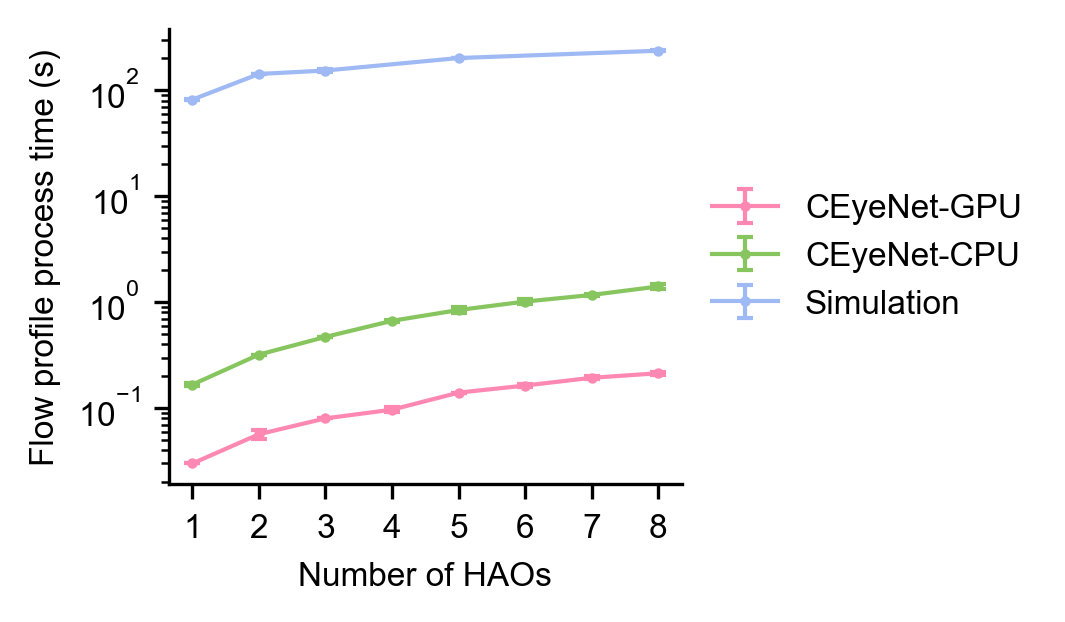

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from utils.visualization import PASTEL_7

pred_gpu_time = pd.read_csv(
    "../Outputs/sim_vs_pred_time/pred gpu time.csv", header=0, index_col=0
)
pred_cpu_time = pd.read_csv(
    "../Outputs/sim_vs_pred_time/pred cpu time.csv", header=0, index_col=0
)
sim_time = pd.read_csv(
    "../Outputs/sim_vs_pred_time/sim time.csv", header=0, index_col=0
)

predgpu_mean = pred_gpu_time.mean(axis=0)
predcpu_mean = pred_cpu_time.mean(axis=0)
sim_mean = sim_time.mean(axis=0)
predgpu_std = pred_gpu_time.std(axis=0)
predcpu_std = pred_cpu_time.std(axis=0)
sim_std = sim_time.std(axis=0)
cm = 1 / 2.54
plt.rcParams.update({"font.size": 8, "font.family": "Arial"})
fig, ax = plt.subplots(figsize=(5.6 * cm, 5 * cm), dpi=300)
line_format = {
    "lw": 1,
    "marker": "o",
    "markersize": 1.5,
    "linestyle": "-",
    "markerfacecolor": "none",
    "capsize": 2,
}

ax.errorbar(
    predgpu_mean.index,
    predgpu_mean,
    yerr=predgpu_std,
    **line_format,
    color=PASTEL_7["red"],
    label = 'CEyeNet-GPU'
)
ax.errorbar(
    predcpu_mean.index,
    predcpu_mean,
    yerr=predcpu_std,
    **line_format,
    color=PASTEL_7["green"],
    label = 'CEyeNet-CPU'
)
ax.errorbar(
    sim_mean.index, 
    sim_mean, 
    yerr=sim_std, 
    **line_format, 
    color=PASTEL_7["blue"],
    label = 'Simulation'
)

ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5), )
ax.set_xlabel("Number of HAOs")
ax.set_ylabel("Flow profile process time (s)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_yscale("log")
# plt.tight_layout()
plt.savefig("time_measure.png")